# Online PyEmittance

The following will work either on a production system, or with a simulated EPICS server.

For local development, start a simulated EPICS server using the `simulated_epics.ipynb` notebook, or run in a separate process:

```python
from pyemittance.simulation_server import start_server
start_server()
```

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pyemittance import PyEmittance, print_logging
import numpy as np
print_logging() # Print log messages here

In [3]:
meas = PyEmittance(config_name='LCLS2_OTR0H04')
meas.online = True

# Set some other options
meas.add_pnts = False
meas.num_points = 7   # only matters if adapt_ranges is used.
meas.adapt_ranges = True  # If helping, will ensure there are at least 7 total points
meas.check_sym = True
meas.infl_check = True

meas.show_plots = True

# Change quad bounds
meas.config_dict['meas_pv_info']['meas_device']['bounds'] = [-6, 8]

# Change settle time
meas.config_dict['meas_pv_info']['meas_device']['settle_time'] = 0.1

meas.config_dict


2023-08-28 15:51:17,502 | INFO : Initializing observer


{'beamline_info': {'name': 'LCLS2',
  'species': 'electron',
  'Lquad': 0.1244,
  'energy': 80000000.0,
  'Twiss0': [1e-06, 1e-06, 5.01, 5.01, 0.049, 0.049],
  'rMatx': [1, 2.2, 0, 1],
  'rMaty': [1, 2.2, 0, 1]},
 'img_proc': {'subtract_bg': False,
  'use_roi': False,
  'avg_ims': True,
  'n_to_acquire': 1,
  'background_im': '/home/physics3/ml_tuning/20220805_LCLS2_inj/example_images/bg_8_6_22.npy',
  'amp_threshold': 150,
  'min_sigma': 3,
  'max_sigma': 700,
  'max_samples': 1,
  'roi': {'xmin': 0, 'xmax': 100, 'ymin': 0, 'ymax': 100}},
 'meas_pv_info': {'diagnostic': {'pv': {'name': 'OTRS:HTR:330',
    'image': 'OTRS:HTR:330:Image:ArrayData',
    'nrow': 'OTRS:HTR:330:Image:ArraySize1_RBV',
    'ncol': 'OTRS:HTR:330:Image:ArraySize0_RBV',
    'resolution': 'OTRS:HTR:330:RESOLUTION',
    'xsize': 'OTRS:HTR:330:XRMS',
    'ysize': 'OTRS:HTR:330:YRMS'}},
  'meas_device': {'settle_time': 0.1,
   'bounds': [-6, 8],
   'pv': {'name': 'QUAD:HTR:120',
    'cntrl': 'QUAD:HTR:120:BCTRL',
   

In [4]:
meas.observer.get_beamsizes(1.2345)

(0.00027328185772235354, 0.00022282070367172368, 0, 0)

In [5]:
# Convenience methods.
meas.quad_init, meas.quad_bounds

([-6, -4, -2, 0], [-6, 8])

In [6]:
meas.config_dict.keys()

dict_keys(['beamline_info', 'img_proc', 'meas_pv_info', 'savepaths'])

In [7]:
meas.config_dict['meas_pv_info']['meas_device']

{'settle_time': 0.1,
 'bounds': [-6, 8],
 'pv': {'name': 'QUAD:HTR:120',
  'cntrl': 'QUAD:HTR:120:BCTRL',
  'read': 'QUAD:HTR:120:BACT'}}

In [8]:
meas.config_dict['img_proc']

{'subtract_bg': False,
 'use_roi': False,
 'avg_ims': True,
 'n_to_acquire': 1,
 'background_im': '/home/physics3/ml_tuning/20220805_LCLS2_inj/example_images/bg_8_6_22.npy',
 'amp_threshold': 150,
 'min_sigma': 3,
 'max_sigma': 700,
 'max_samples': 1,
 'roi': {'xmin': 0, 'xmax': 100, 'ymin': 0, 'ymax': 100}}

2023-08-28 15:51:17,678 | INFO : Initializing observer
2023-08-28 15:51:17,679 | INFO : Running online!
2023-08-28 15:51:17,679 | INFO : EPICS put QUAD:HTR:120:BCTRL = -6
2023-08-28 15:51:17,680 | INFO : Settling for 0.1 s...
2023-08-28 15:51:18,019 | INFO : 2023-08-28_15-51-18-019432
2023-08-28 15:51:18,089 | INFO : EPICS put QUAD:HTR:120:BCTRL = -4
2023-08-28 15:51:18,089 | INFO : Settling for 0.1 s...
2023-08-28 15:51:18,342 | INFO : 2023-08-28_15-51-18-342163
[<pyemittance.image.Image object at 0x12d284e80>, <pyemittance.image.Image object at 0x12fbcf8b0>]
2023-08-28 15:51:18,390 | INFO : EPICS put QUAD:HTR:120:BCTRL = -2
2023-08-28 15:51:18,390 | INFO : Settling for 0.1 s...
2023-08-28 15:51:18,640 | INFO : 2023-08-28_15-51-18-640508
[<pyemittance.image.Image object at 0x12d284e80>, <pyemittance.image.Image object at 0x12fbcf8b0>, <pyemittance.image.Image object at 0x12d5ab8b0>]
2023-08-28 15:51:18,687 | INFO : EPICS put QUAD:HTR:120:BCTRL = 0
2023-08-28 15:51:18,688 | INFO : Sett

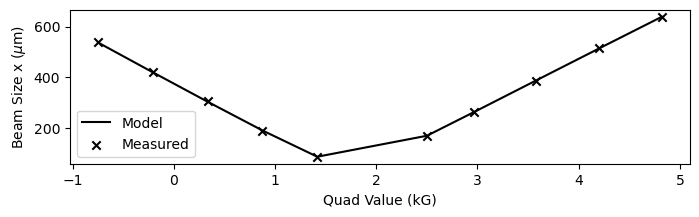

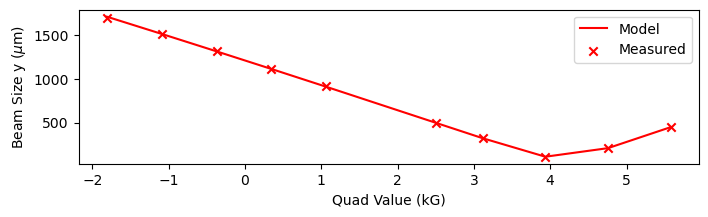

In [9]:
result = meas.measure_emittance()

# Examine results

In [10]:
import matplotlib.pyplot as plt

In [11]:
result

{'quadvalsx': array([-0.74736011, -0.20613343,  0.33509326,  0.87631994,  1.41754663,
         2.5       ,  2.96390859,  3.58245337,  4.20099815,  4.81954294]),
 'beamsizesx': array([5.39244377e-04, 4.21389063e-04, 3.05656489e-04, 1.90211255e-04,
        8.78135007e-05, 1.70298614e-04, 2.63311064e-04, 3.87753273e-04,
        5.15488852e-04, 6.39260643e-04]),
 'beamsizeserrx': array([6.52836330e-07, 4.36072374e-07, 2.76023349e-07, 1.33385314e-07,
        3.64693624e-08, 1.26351118e-07, 2.04373947e-07, 4.11587694e-07,
        6.26623589e-07, 8.60206489e-07]),
 'error_x': False,
 'emit_x': 6.3886017165810395e-09,
 'norm_emit_x': 1.0001541314811921e-06,
 'beta_x': 10.006400644740102,
 'alpha_x': -2.014918975203852,
 'emit_x_err': 1.2029472638527251e-11,
 'norm_emit_x_err': 1.8832488379635193e-09,
 'beta_x_rel_err': 0.0018829586147632018,
 'alpha_x_rel_err': -5.2228493200404726e-20,
 'sigma_11': 6.392690833578424e-08,
 'sigma_12': 1.2872514823759039e-08,
 'sigma_22': 3.2304998811493818e-09,

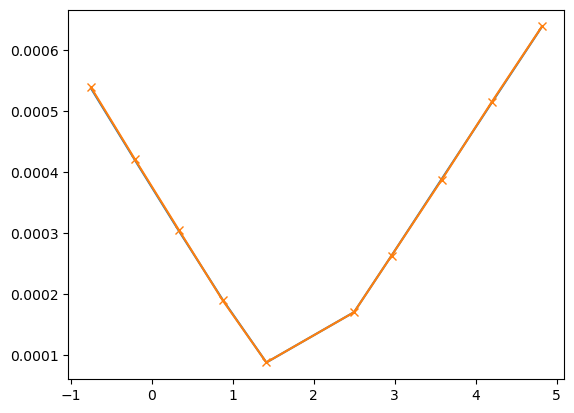

In [12]:
plt.plot(result['quadvalsx'], np.sqrt(result['screen_sigma_11']))
plt.plot(result['quadvalsx'], result['beamsizesx'], marker='x')

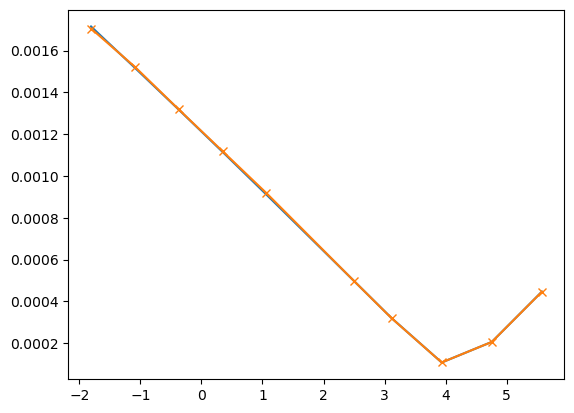

In [13]:
plt.plot(result['quadvalsy'], np.sqrt(result['screen_sigma_33']))
plt.plot(result['quadvalsy'], result['beamsizesy'], marker='x')

# Observer

The observer keeps all measurements made, as well as extra information such as images.

In [14]:
o = meas.observer
o.beam_meas['x']

[0.0017373705977330874,
 0.001264789410887946,
 0.000816755537397833,
 0.000772000685266133,
 0.0006107422189399383,
 0.0005392443767247187,
 0.0004574825102658565,
 0.0004213890633249773,
 0.0003768104140631252,
 0.00030565648867134196,
 0.00019021125494894566,
 0.00015256019587211496,
 8.781350068371428e-05,
 nan,
 7.415256445838183e-05,
 0.00017029861378663926,
 0.0002633110642596808,
 0.00029593981528544983,
 0.0003877532727577782,
 0.0004630187783867498,
 0.00051548885155925,
 0.0006282117497397514,
 0.0006392606432124199,
 0.0007936837678259384]

In [15]:
o.extra

 None,

In [16]:
# The observer can also set the quad and return sizes (and extra image).
dat = o.get_beamsizes(1.2345)
dat

2023-08-28 15:51:25,596 | INFO : EPICS put QUAD:HTR:120:BCTRL = 1.2345
2023-08-28 15:51:25,597 | INFO : Settling for 0.1 s...
2023-08-28 15:51:25,844 | INFO : 2023-08-28_15-51-25-844136


{'xrms': 0.00011935909433498742,
 'yrms': 0.000857597248432307,
 'xrms_err': 6.732140206966792e-08,
 'yrms_err': 1.517348220414279e-06,
 'extra': <pyemittance.image.Image at 0x28ac0be20>}

In [17]:
# This is the image
im = dat['extra']
im

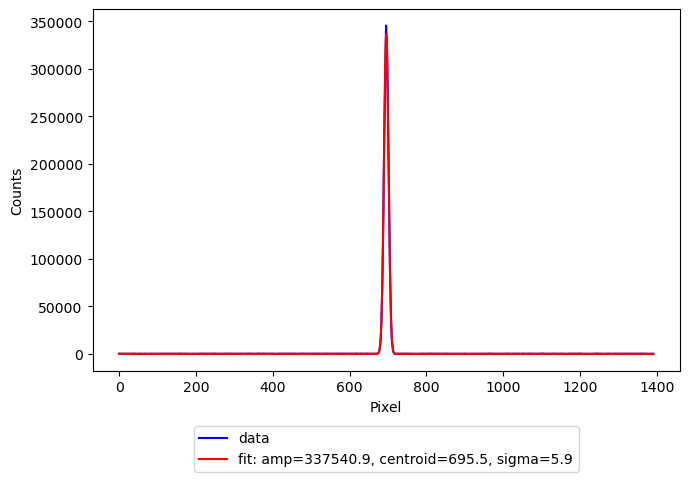

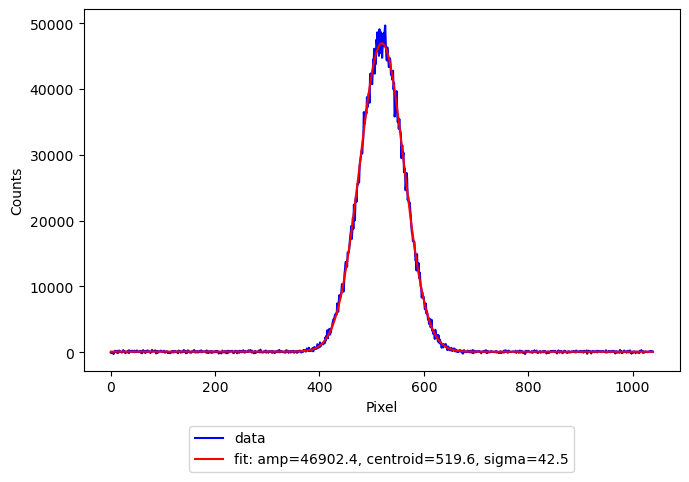

{'xrms': 5.908866056187496,
 'yrms': 42.455309328332035,
 'xrms_err': 0.0033327426767162335,
 'yrms_err': 0.07511624853536035,
 'xamp': 337540.9059711624,
 'yamp': 46902.41248016074}

In [18]:
# This plots. TODO: make a .plot() instead
im.get_sizes()

# Interactively change the quad and acquire the screen image

0.00037486171231124573


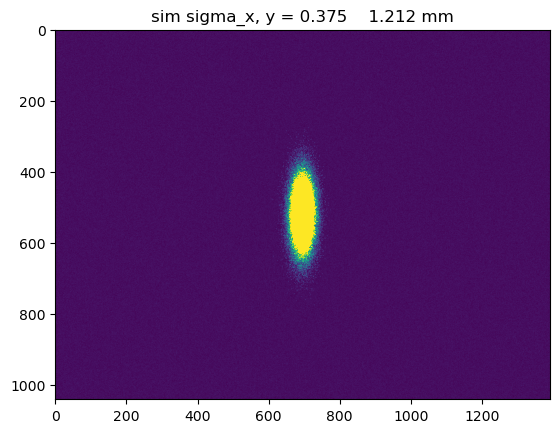

In [19]:
import epics
import matplotlib.pyplot as plt

from ipywidgets import interact

def f(quad_value):
    epics.caput('QUAD:HTR:120:BCTRL', quad_value)
    a = epics.caget('OTRS:HTR:330:Image:ArrayData').reshape(1040, 1392)
    sigma_x = epics.caget('sim_screen_sigma_x')
    sigma_y = epics.caget('sim_screen_sigma_y')  
    print(sigma_x)
    plt.imshow(a, vmax=128)
    plt.title(f'sim sigma_x, y = {sigma_x*1e3:0.3f}    {sigma_y*1e3:0.3f} mm')
    
# interact(f, quad_value=(-4, 4, .1))    
f(0)